In [ ]:
!pip install imgaug
!pip install Cython
!pip install pycocotools
!pip install scikit-image==0.16.2
# !pip install keras==2.1.0
# !pip install tensorflow==2.5.0
# !pip install tensorflow-gpu==2.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.9/28.9 MB 41.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-image: filename=scikit_image-0.16.2-cp310-cp310-linux_x86_64.whl size=44360581 sha256=5fb579ab5494c1ab21f2e2173f0704c1b2035f54cdeb82f86fb2b43a8c20ea15
  Stored in directory: /root/.cache/pip/wheels/11/e0/84/31153110b9642863a93aec3f8813972a87d0d37958783c009d
Successfully built scikit-image
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 83.4 

In [ ]:
!unzip archive.zip
!git clone https://github.com/alsombra/Mask_RCNN
%cd Mask_RCNN/
!python setup.py install

Archive:  archive.zip
  inflating: annotations/fruit0.xml  
  inflating: annotations/fruit1.xml  
  inflating: annotations/fruit10.xml  
  inflating: annotations/fruit100.xml  
  inflating: annotations/fruit101.xml  
  inflating: annotations/fruit102.xml  
  inflating: annotations/fruit103.xml  
  inflating: annotations/fruit104.xml  
  inflating: annotations/fruit105.xml  
  inflating: annotations/fruit106.xml  
  inflating: annotations/fruit107.xml  
  inflating: annotations/fruit108.xml  
  inflating: annotations/fruit109.xml  
  inflating: annotations/fruit11.xml  
  inflating: annotations/fruit110.xml  
  inflating: annotations/fruit111.xml  
  inflating: annotations/fruit112.xml  
  inflating: annotations/fruit113.xml  
  inflating: annotations/fruit114.xml  
  inflating: annotations/fruit115.xml  
  inflating: annotations/fruit116.xml  
  inflating: annotations/fruit117.xml  
  inflating: annotations/fruit118.xml  
  inflating: annotations/fruit119.xml  
  inflating: annotations

Installing Mask-RCNN lib

In [ ]:
import os
import sys
import random
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [ ]:
CLASSES = ['nothing', 'pineapple', 'snake fruit', 'dragon fruit', 'banana']

In [ ]:
%cd ..

/content


In [ ]:
import os
import random
import shutil

# Set the path to your dataset directory
dataset_dir = 'dataset'

# Set the output directories for train and val splits
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

# Create output directories if they don't exist
os.makedirs(os.path.join(train_dir, 'annotations'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'annotations'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'images'), exist_ok=True)

# List all files in the annotations directory
annotation_files = os.listdir(os.path.join(dataset_dir, 'annotations'))

# Randomly shuffle the list of annotation files
random.shuffle(annotation_files)

# Calculate the number of files for the train and val splits
num_train_files = int(len(annotation_files) * 0.9)
num_val_files = len(annotation_files) - num_train_files

# Split the files into train and val sets
train_files = annotation_files[:num_train_files]
val_files = annotation_files[num_train_files:]

# Copy annotation files to the appropriate directories
for file in train_files:
    annotation_path = os.path.join(dataset_dir, 'annotations', file)
    image_path = os.path.join(dataset_dir, 'images', file.replace('.xml', '.png'))
    shutil.copy(annotation_path, os.path.join(train_dir, 'annotations', file))
    shutil.copy(image_path, os.path.join(train_dir, 'images', file.replace('.xml', '.png')))

for file in val_files:
    annotation_path = os.path.join(dataset_dir, 'annotations', file)
    image_path = os.path.join(dataset_dir, 'images', file.replace('.xml', '.png'))
    shutil.copy(annotation_path, os.path.join(val_dir, 'annotations', file))
    shutil.copy(image_path, os.path.join(val_dir, 'images', file.replace('.xml', '.png')))

print(f'{num_train_files} annotations and images copied to {train_dir}')
print(f'{num_val_files} annotations and images copied to {val_dir}')

180 annotations and images copied to dataset/train
20 annotations and images copied to dataset/val


In [ ]:
class FruitConfig(Config):
    # Give the configuration a recognizable name
    NAME = "fruit_detection"

    NUM_CLASSES = 1 + 4

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = FruitConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
class FruitDataset(utils.Dataset):
    images_root = 'images'
    annotation_root = 'annotations'

    def load_dataset(self, dataset_dir):
        self.add_class('dataset', 1, 'pineapple')
        self.add_class('dataset', 2, 'snake fruit')
        self.add_class('dataset', 3, 'dragon fruit')
        self.add_class('dataset', 4, 'banana')

        # find all images
        for i, filename in enumerate(os.listdir(f"{dataset_dir}/{self.images_root}")):
            if '.png' in filename:
                self.add_image(
                    'dataset',
                    image_id=i,
                    path=os.path.join(f"{dataset_dir}/{self.images_root}", filename),
                    annotation=os.path.join(f"{dataset_dir}/{self.annotation_root}", filename.replace('.png', '.xml'))
                )

    # extract bounding boxes from an annotation file
    def extract_boxes(self, filename):
        # load and parse the file
        tree = ET.parse(filename)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = []
        classes = []
        for member in root.findall('object'):
            bbox = member.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)
            boxes.append([xmin, ymin, xmax, ymax])
            classes.append(self.class_names.index(member[0].text))
        # extract image dimensions
        width = int(root.find('size')[0].text)
        height = int(root.find('size')[1].text)
        return boxes, classes, width, height

    # load the masks for an image
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # define box file location
        path = info['annotation']
        # load XML
        boxes, classes, w, h = self.extract_boxes(path)
        # create one array for all masks, each on a different channel
        masks = np.zeros([h, w, len(boxes)], dtype='uint8')
        # create masks
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
        return masks, np.asarray(classes, dtype='int32')

    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

In [ ]:
# Create training and validation set
# train set
dataset_train = FruitDataset()
dataset_train.load_dataset('dataset/train')
dataset_train.prepare()
print('Train: %d' % len(dataset_train.image_ids))

# test/val set
dataset_val = FruitDataset()
dataset_val.load_dataset('dataset/val')
dataset_val.prepare()
print('Test: %d' % len(dataset_val.image_ids))

Train: 180
Test: 20


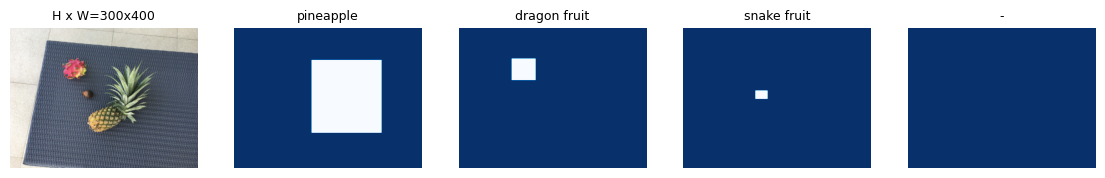

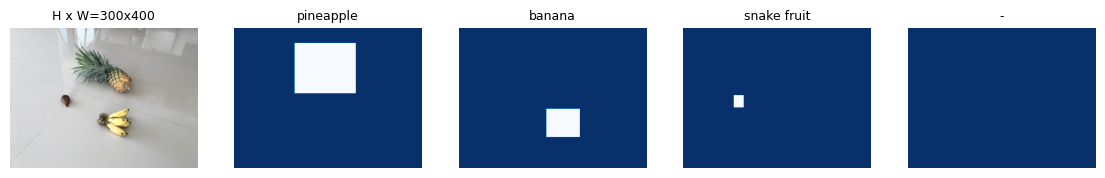

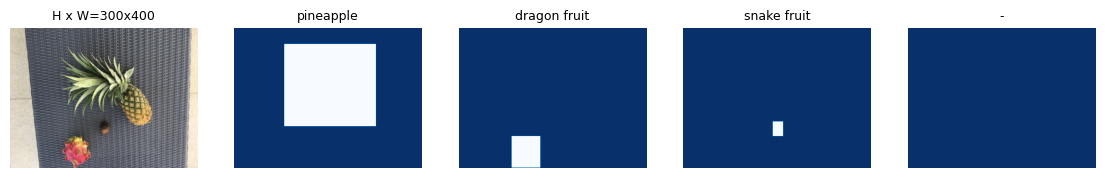

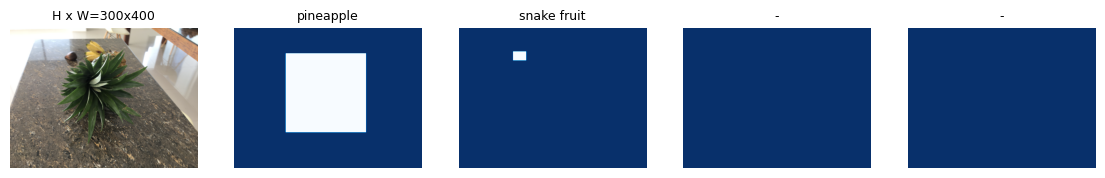

In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [ ]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config, model_dir=MODEL_DIR)

In [ ]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

In [ ]:
import skimage as sk
print(sk.__version__)

0.19.3


In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
model.train(
    dataset_train,
    dataset_val,
    learning_rate=config.LEARNING_RATE,
    epochs=5,
    layers='heads',
)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/logs/fruit_detection20231103T1104/mask_rcnn_fruit_detection_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_decon

/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5


KeyboardInterrupt: ignored

In [ ]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)

2.14.0
2.14.0
